In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import torchaudio
import numpy as np
import torch
import torchaudio
from torch import nn
import torch.nn.functional as F

All model settings:
window:20ms, hop:10ms, no additional look ahead

# DPT Model

In [9]:
# [noreverbPESQ, STOI, SISNR, ERLE, wireverbPESQ, STOIW, SISNR, ERLE, params, macs]
baseline_dptcompress = [
    #     [2.71, 95.91, 17.26, 11.93, 2.89, 92.56, 15.83, 11.93, 1827,109],
    [2.61, 95.71, 16.67, 20.56, 2.83, 92.28, 15.76, 20.56, 884, 567],
    [2.60, 95.70, 16.61, 18.66, 2.73, 91.89, 15.52, 18.66, 878, 326],
    [2.60, 95.64, 16.46, 19.71, 2.74, 91.92, 15.52, 19.71, 882, 211],
    [2.47, 95.15, 16.17, 21.49, 2.58, 91.00, 14.95, 21.49, 870, 148],
]
dptv40 = [
    [2.23, 94.14, 15.40, 19.49, 2.35, 89.66, 14.51, 19.49, 164, 52],
    [2.55, 95.37, 16.23, 19.91, 2.67, 91.51, 15.18, 19.91, 180, 105],
    [2.61, 95.62, 16.55, 23.72, 2.76, 92.00, 15.70, 23.72, 237, 197],
    [2.70, 95.98, 16.82, 17.73, 2.86, 92.40, 15.94, 17.73, 314, 324],
    [2.78, 96.09, 17.15, 20.85, 2.91, 92.65, 15.99, 20.85, 438, 521],
]
dptv50 = [
    [2.42, 95.09, 16.31, 21.70, 2.46, 90.56, 14.93, 21.70, 228, 54],
    [2.60, 95.67, 16.80, 19.91, 2.69, 91.46, 15.61, 19.91, 239, 102],
    [2.69, 96.02, 17.56, 14.62, 2.81, 92.18, 15.99, 14.62, 417, 205],
    [2.78, 96.29, 17.50, 10.92, 2.94, 92.63, 16.20, 10.92, 565, 328],
    [2.87, 96.53, 17.82, 15.05, 2.99, 92.97, 16.41, 15.05, 968, 499],
]

# LSTM Model

In [10]:
# covering 20, 50, 100, 250, 500M MACs
LSTM_models = [
    # [2.73, 96.09, 17.19, 23.09, 2.77, 91.94, 15.78, 23.09,5887,590],
    [2.70, 96.05, 17.19, 17.06, 2.74, 91.92, 15.71, 17.06, 5000, 501],
    [2.62, 95.79, 16.72, 21.98, 2.67, 91.44, 15.53, 21.98, 1909, 192],
    [2.51, 95.43, 16.36, 20.75, 2.58, 91.09, 15.21, 20.75, 968, 98],
    [2.40, 95.03, 15.75, 23.00, 2.45, 90.60, 14.67, 23.00, 497, 50],
    [2.18, 94.23, 14.94, 23.00, 2.29, 89.71, 14.12, 23.00, 196, 20],
]

# Fast Fullsubnet

In [11]:
fastfullsubnet = [[2.56, 95.79, 16.79, 15.65, 2.70, 91.74, 15.45, 15.65, 6744, 2124]]

# Deepfilter Models

In [12]:
deepfilter_models = [
    # [2.73, 96.22, 17.37, 18.57, 2.78, 91.80, 15.70, 18.57,2068,501],
    [
        2.71,
        96.15,
        17.04,
        20.39,
        2.78,
        92.14,
        15.69,
        20.39,
        2013,
        332,
    ],  # from here offical code
    # [2.58, 95.81, 17.33, 17.71, 2.69, 91.63, 15.51, 17.71,2195,318],
    [2.31, 94.90, 16.15, 13.47, 2.36, 90.08, 14.31, 13.47, 464, 66],  # offer by rilin
]

# BSRNN Models

In [13]:
bsrnn_models = [
    # [3.19, 97.64, 20.03, None, 3.32, 94.54, 17.45, None, 10584,12991],
    [2.60, 95.89, 16.96, 21.57, 2.80, 92.19, 15.60, 21.57, 780, 498],
]

In [ ]:
# FSB
fsb_models = [
    # [3.19, 97.64, 20.03, None, 3.32, 94.54, 17.45, None, 10584,12991],
    [2.60, 95.89, 16.96, 21.57, 2.80, 92.19, 15.60, 21.57, 780, 498],
]

# Plot

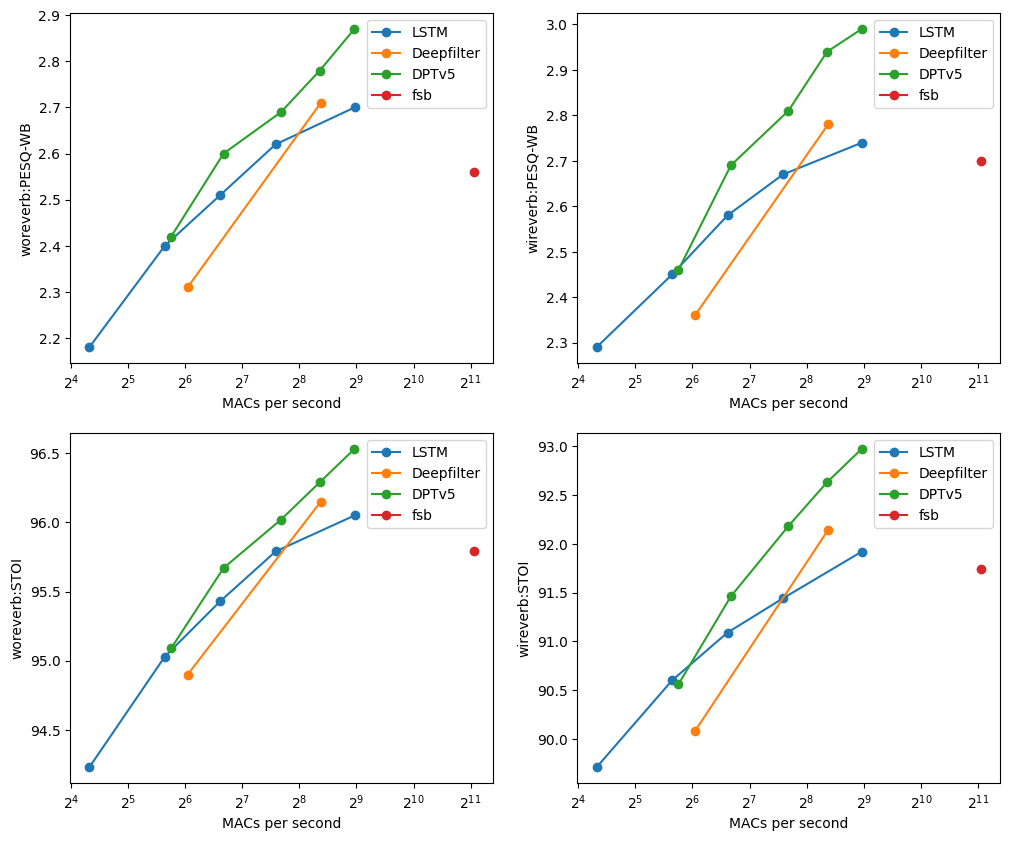

In [14]:
fig, ax = plt.subplots(2, 2)
metric_names = [
    [0, "woreverb:PESQ-WB"],
    [4, "wireverb:PESQ-WB"],
    [1, "woreverb:STOI"],
    [5, "wireverb:STOI"],
]
model_metrics = [
    ["LSTM", LSTM_models],
    ["Deepfilter", deepfilter_models],
    ["DPTv5", dptv50],
    ["fsb", fastfullsubnet],
]
xlabel_ind = -1
xlabel_name = "MACs per second"
for indaxi in range(ax.shape[0]):
    for indaxj in range(ax.shape[1]):
        ind = indaxi * ax.shape[0] + indaxj
        fig = ax[indaxi][indaxj].get_figure()
        fig.set_size_inches(12, 10)
        for model_name, p in model_metrics:
            ax[indaxi][indaxj].semilogx(
                list(zip(*p))[xlabel_ind],
                list(zip(*p))[metric_names[ind][0]],
                "o-",
                label=model_name,
                base=2,
            )
        ax[indaxi][indaxj].set_xlabel(xlabel_name)
        ax[indaxi][indaxj].set_ylabel(metric_names[ind][1])
        ax[indaxi][indaxj].legend()

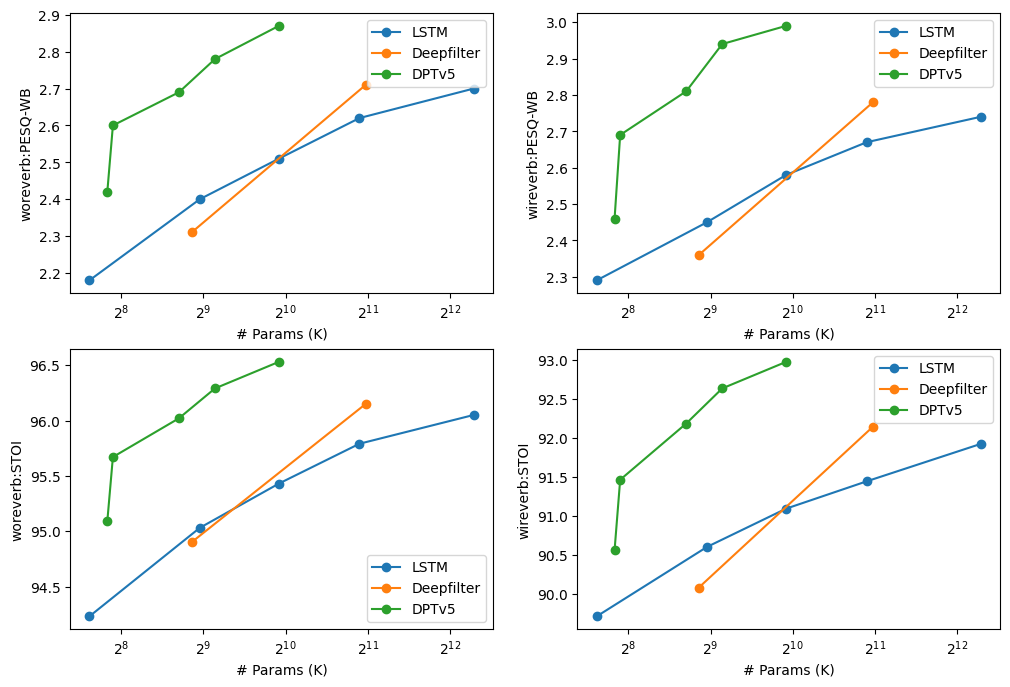

In [9]:
fig, ax = plt.subplots(2, 2)
metric_names = [
    [0, "woreverb:PESQ-WB"],
    [4, "wireverb:PESQ-WB"],
    [1, "woreverb:STOI"],
    [5, "wireverb:STOI"],
]
model_metrics = [
    ["LSTM", LSTM_models],
    ["Deepfilter", deepfilter_models],
    ["DPTv5", dptv50],
]
xlabel_ind = -2
xlabel_name = "# Params (K)"
for xind in range(ax.shape[0]):
    for yind in range(ax.shape[1]):
        ind = xind * ax.shape[0] + yind
        fig = ax[xind][yind].get_figure()
        fig.set_size_inches(12, 8)
        for model_name, p in model_metrics:
            ax[xind][yind].semilogx(
                list(zip(*p))[xlabel_ind],
                list(zip(*p))[metric_names[ind][0]],
                "o-",
                label=model_name,
                base=2,
            )
        ax[xind][yind].set_xlabel(xlabel_name)
        ax[xind][yind].set_ylabel(metric_names[ind][1])
        ax[xind][yind].legend()

# 曲线拟合

In [10]:
def transX2Polynomial(x, order):
    for i in range(order):
        if i == 0:
            x_stacked = np.power(x, i)
        else:
            x_stacked = np.column_stack((x_stacked, np.power(x, i)))
    return x_stacked


def ridgePolynomialFit(x, y, order, regulator=0.05):
    xPoly = transX2Polynomial(x, order)
    weight = (
        np.linalg.inv((xPoly.T.dot(xPoly)) + regulator * np.eye(order))
        .dot(xPoly.T)
        .dot(y)
    )
    return weight


def lassoPolynomialFit(
    x, y, order, regulator=0.05, eps=0.001, minChange=0.002, maxIter=10000
):
    xPoly = transX2Polynomial(x, order)
    weight = np.zeros(
        order,
    )
    currentError = np.inf
    for i in range(maxIter):
        currentError0 = currentError
        wtTemp = weight.copy()
        for j in range(order):
            for sign in [-1, 1]:
                wtTemp[j] += eps * sign
                ytemp = xPoly.dot(wtTemp)
                errorTemp = (ytemp - y).T.dot(ytemp - y)
                if errorTemp < currentError:
                    currentError = errorTemp
                else:
                    wtTemp[j] -= eps * sign
        weight = wtTemp.copy()
        # print("The currrent error is %f in iter %d"%(currentError,i))
        if abs(currentError - currentError0) < minChange:
            break
    return weight


def testPolynomial(xArrayForTest, weight):
    xPoly = transX2Polynomial(xArrayForTest, weight.shape[0])
    y = xPoly.dot(weight)
    return [xArrayForTest, y]

In [11]:
from sklearn import linear_model

xlabel:MACs per second, ylabel:woreverb:PESQ-WB, coefft:0.13
xlabel:MACs per second, ylabel:wireverb:PESQ-WB, coefft:0.16
xlabel:# Params (K), ylabel:woreverb:PESQ-WB, coefft:0.18
xlabel:# Params (K), ylabel:wireverb:PESQ-WB, coefft:0.22


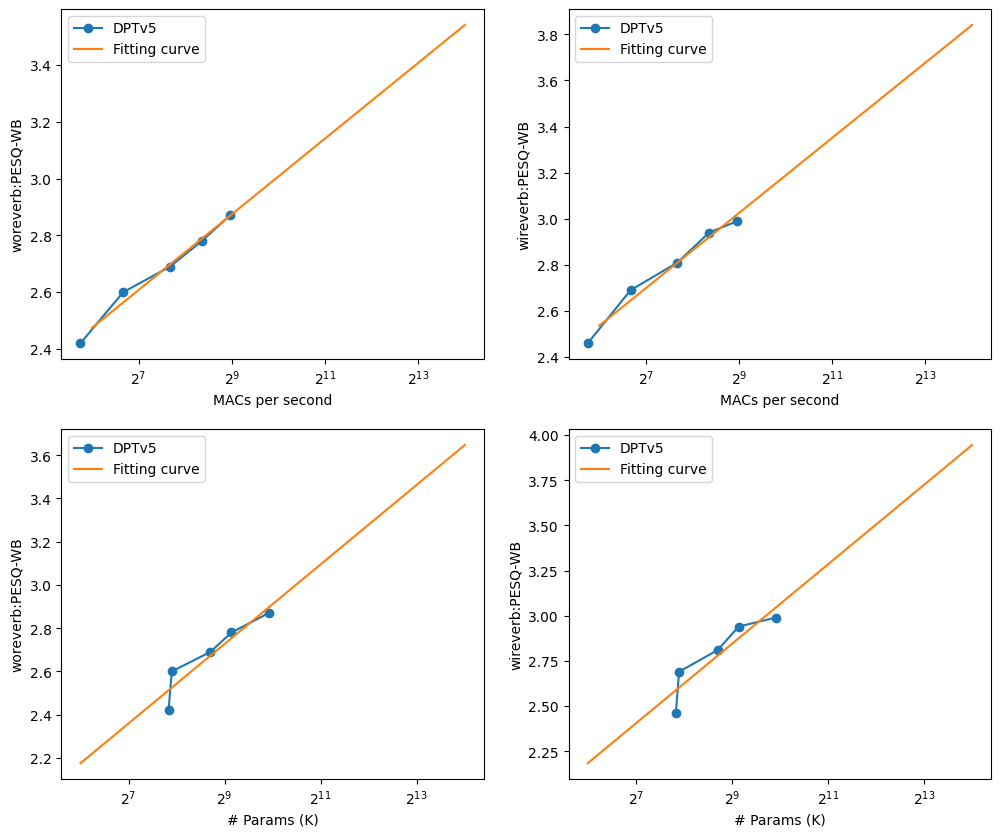

In [12]:
metric_names = [
    [0, "woreverb:PESQ-WB"],
    [4, "wireverb:PESQ-WB"],
]
xlabel_ind = [-1, -2]
xlabel_name = ["MACs per second", "# Params (K)"]
p = dptv50
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12, 10)
for xind in range(len(xlabel_ind)):
    for yind in range(len(metric_names)):
        xdata = np.array(list(zip(*p))[xlabel_ind[xind]])
        ydata = np.array(list(zip(*p))[metric_names[yind][0]])
        from sklearn import datasets, linear_model

        regr = linear_model.LinearRegression()
        regr.fit(np.log2(xdata).reshape(-1, 1), ydata.reshape(-1, 1))
        print(
            "xlabel:{}, ylabel:{}, coefft:{:.02f}".format(
                xlabel_name[xind], metric_names[yind][1], regr.coef_[0, 0]
            )
        )
        xsimu = np.power(2.0, np.linspace(6, 14, 8))
        ysimu = regr.predict(np.log2(xsimu).reshape(-1, 1))
        ax[xind][yind].semilogx(xdata, ydata, "o-", label=model_name, base=2)
        ax[xind][yind].semilogx(xsimu, ysimu, "-", label="Fitting curve", base=2)
        ax[xind][yind].set_xlabel(xlabel_name[xind])
        ax[xind][yind].set_ylabel(metric_names[yind][1])
        ax[xind][yind].legend()